# Load Data set From kaggle



In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/ # access our account in kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json # read and write from our account

In [ ]:
! kaggle datasets download  andrewmvd/leukemia-classification
# download the dataset

leukemia-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/leukemia-classification.zip
#unzip dataset file 


Archive:  /content/leukemia-classification.zip
replace C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data/1.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import / Preprocessing Dataset


In [ ]:
import numpy as np # perform the mathematical operation
import pandas as pd # reads any File, CSV, Excle
import matplotlib.pyplot as plt #  read and show pic 
#import seaborn as sns # graph
import glob # to read paths and make it global
from pathlib import Path #PIC
import cv2 # HANDLING PIC 
import os

In [ ]:
train_all0 = '/content/C-NMC_Leukemia/training_data/fold_0/all'
train_all1 = '/content/C-NMC_Leukemia/training_data/fold_1/all'
train_all2 = '/content/C-NMC_Leukemia/training_data/fold_2/all'
train_hem0 = '/content/C-NMC_Leukemia/training_data/fold_0/hem'
train_hem1 = '/content/C-NMC_Leukemia/training_data/fold_1/hem'
train_hem2 = '/content/C-NMC_Leukemia/training_data/fold_2/hem'

In [ ]:
#identify training dataset
training_data = pd.DataFrame(columns = ['Path','Label'])
for folder in [train_all0,train_all1,train_all2,train_hem0,train_hem1,train_hem2]:
    for i in os.listdir(folder):
        img = os.path.join(folder,i)
        if('all' in folder):
            label = '1'
        elif('hem' in folder):
            label = '0'
        training_data = training_data.append({'Path':img,'Label':label},ignore_index=True)
    
print(len(training_data))

10661


In [ ]:
# read csv file to extract labels 
validation_label =pd.read_csv( '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv')
# read imag path
validation_path = '/content/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data'
paths= []
for i in os.listdir(validation_path):
    img = os.path.join(validation_path,i)
    paths.append(img)
validation_data = pd.DataFrame({'Path': paths ,'Label': validation_label['labels']})
len(validation_data)

1867

In [ ]:
# read imag path
testing_path = '/content/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'
testing= []
for i in os.listdir(testing_path):
    img = os.path.join(testing_path,i)
    testing.append(testing)
len(testing)

2586

In [ ]:
training_data.head()

,Path,Label
0,/content/C-NMC_Leukemia/training_data/fold_0/a...,1
1,/content/C-NMC_Leukemia/training_data/fold_0/a...,1
2,/content/C-NMC_Leukemia/training_data/fold_0/a...,1
3,/content/C-NMC_Leukemia/training_data/fold_0/a...,1
4,/content/C-NMC_Leukemia/training_data/fold_0/a...,1


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    10661 non-null  object
 1   Label   10661 non-null  object
dtypes: object(2)
memory usage: 166.7+ KB


In [ ]:
# display 10 images and if its leukemia or normal cell
leukemia_data = training_data[training_data['Label'] == '1']['Path'].iloc[:10].tolist()
normal_data = training_data[training_data['Label'] == '0']['Path'].iloc[:10].tolist()

Text(0.5, 1.0, 'Normal cell')

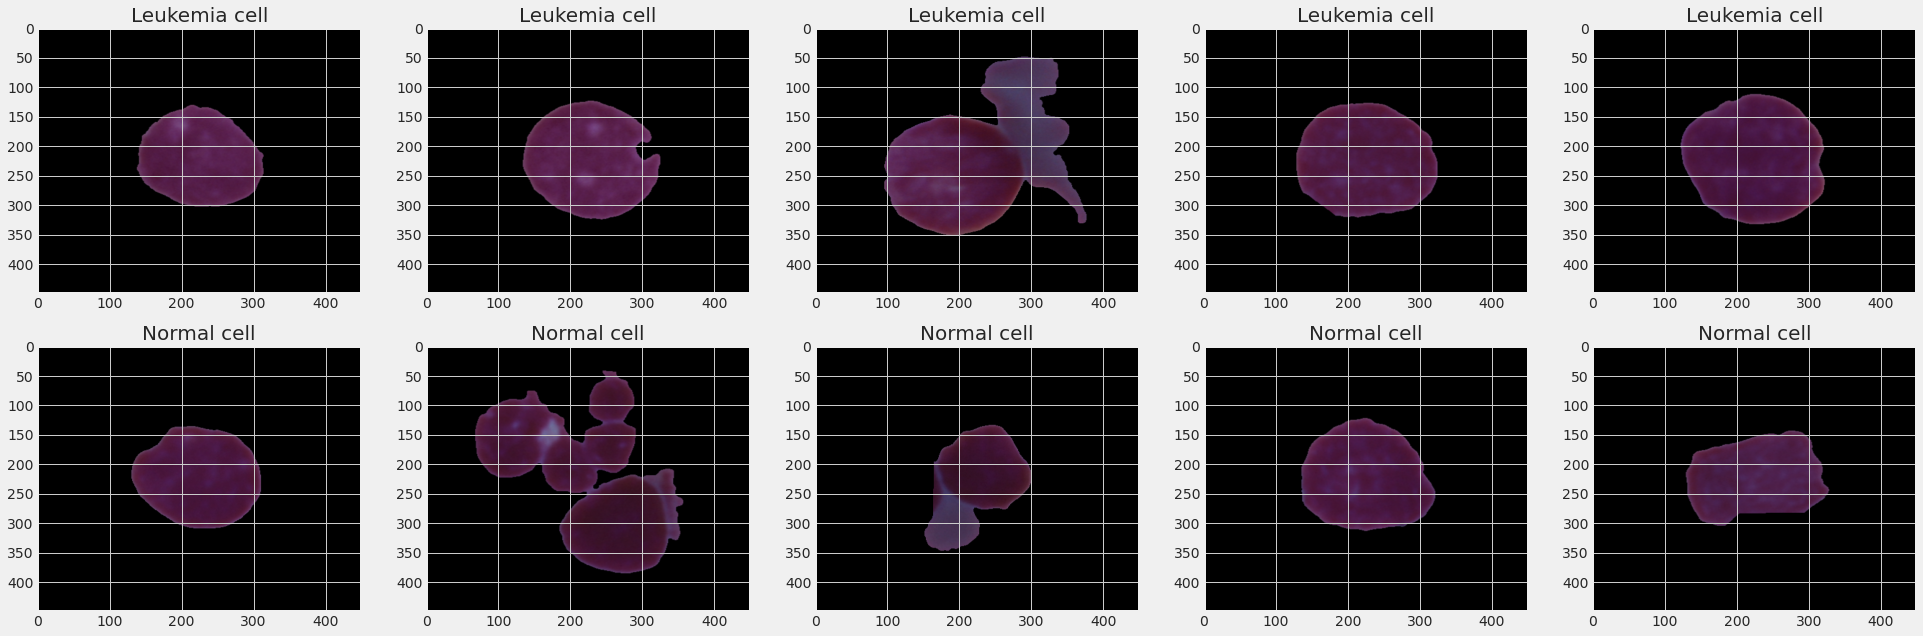

In [ ]:
#image size and dimensions
fig = plt.figure(figsize = (30, 10))

plt.subplot(2,5,1)
# read the image 
image = cv2.imread(str(leukemia_data[0]))
# display the image 
plt.imshow(image, aspect="auto")
#display the title for the image
plt.title('Leukemia cell', fontsize = 20)

plt.subplot(2,5,2)
image = cv2.imread(str(leukemia_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Leukemia cell', fontsize = 20)

plt.subplot(2,5,3)
image = cv2.imread(str(leukemia_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Leukemia cell', fontsize = 20)

plt.subplot(2,5,4)
image = cv2.imread(str(leukemia_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Leukemia cell', fontsize = 20)

plt.subplot(2,5,5)
image = cv2.imread(str(leukemia_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Leukemia cell', fontsize = 20)

plt.subplot(2,5,6)
image = cv2.imread(str(normal_data[0]))
plt.imshow(image, aspect="auto")
plt.title('Normal cell', fontsize = 20)

plt.subplot(2,5,7)
image = cv2.imread(str(normal_data[1]))
plt.imshow(image, aspect="auto")
plt.title('Normal cell', fontsize = 20)

plt.subplot(2,5,8)
image = cv2.imread(str(normal_data[2]))
plt.imshow(image, aspect="auto")
plt.title('Normal cell', fontsize = 20)

plt.subplot(2,5,9)
image = cv2.imread(str(normal_data[3]))
plt.imshow(image, aspect="auto")
plt.title('Normal cell', fontsize = 20)

plt.subplot(2,5,10)
image = cv2.imread(str(normal_data[4]))
plt.imshow(image, aspect="auto")
plt.title('Normal cell', fontsize = 20)

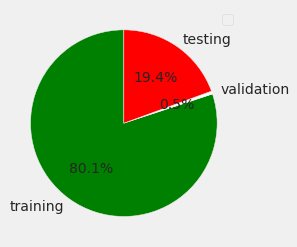

10661


In [ ]:
tr=len(training_data)
vd=len(validation_path)
ts=len(testing)
import matplotlib.pyplot as plt
import numpy as np

y = np.array([tr,vd,ts])

mylabels = ["training", "validation", "testing"]
mycolors = ["Green", "White", "Red"]

plt.legend()

plt.pie(y, labels = mylabels, colors = mycolors, startangle=90, autopct='%1.1f%%')
plt.show() 
print(len(training_data))

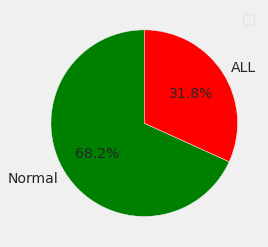

In [ ]:
L1=len( training_data[training_data['Label'] == '1'])
l0=len( training_data[training_data['Label'] == '0'])
y = np.array([L1,l0])

mylabels = ['Normal', 'ALL']
mycolors = ["Green", "red"]

plt.legend()

plt.pie(y, labels = mylabels, colors = mycolors, startangle=90, autopct='%1.1f%%')
plt.show() 

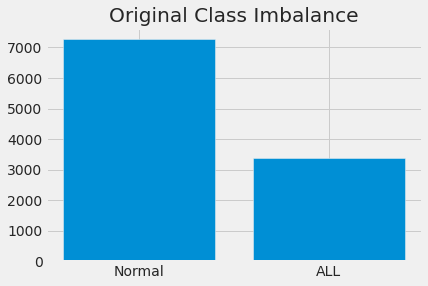

In [ ]:
plt.bar(['Normal', 'ALL'], [len( training_data[training_data['Label'] == '1']), len( training_data[training_data['Label'] == '0'])])
plt.title('Original Class Imbalance')
plt.show()

#Define Model


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet  import ResNet50
from keras.applications.xception  import Xception
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
print ('modules loaded')

modules loaded


Define a function to print text in RGB foreground and background colors

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

Define code for custom callback


In [ ]:
class LRA(keras.callbacks.Callback):
    def __init__(self,model, base_model, patience,stop_patience, threshold, factor, dwell, batches, initial_epoch,epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.base_model=base_model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.batches=batches # number of training batch to runn per epoch
        self.initial_epoch=initial_epoch
        self.epochs=epochs
        self.ask_epoch=ask_epoch
        self.ask_epoch_initial=ask_epoch # save this value to restore if restarting training
        # callback variables 
        self.count=0 # how many times lr has been reduced without improvement
        self.stop_count=0        
        self.best_epoch=1   # epoch with the lowest loss        
        self.initial_lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it         
        self.highest_tracc=0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss=np.inf # set lowest validation loss to infinity initially
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights=self.model.get_weights()   # save initial weights if they have to get restored 
        
    def on_train_begin(self, logs=None):        
        if self.base_model != None:
            status=base_model.trainable
            if status:
                msg=' initializing callback starting training with base_model trainable'
            else:
                msg='initializing callback starting training with base_model not trainable'
        else:
            msg='initialing callback and starting training'                        
        print_in_color (msg, (244, 252, 3), (55,65,80)) 
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print_in_color(msg, (244,252,3), (55,65,80)) 
        self.start_time= time.time()
        
    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time            
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        msg=f'Training is completed - model is set with weights from epoch {self.best_epoch} '
        print_in_color(msg, (0,255,0), (55,65,80))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color(msg, (0,255,0), (55,65,80))   
        
    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy 
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count        
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now 
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy 
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')        
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (acc-self.highest_tracc )*100/self.highest_tracc
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                self.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.best_epoch=epoch + 1  # set the value of best epoch for this epoch              
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1: # lr should be adjusted
                    color=(245, 170, 66)
                    lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count=0 # reset counter
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (self.lowest_vloss- v_loss )*100/self.lowest_vloss
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                self.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)                
                self.best_epoch=epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count>=self.patience-1: # need to adjust lr
                    color=(245, 170, 66)
                    lr=lr * self.factor # adjust the learning rate                    
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,255), (55,65,80))
            self.model.stop_training = True # stop training
        else: 
            if self.ask_epoch !=None:
                if epoch + 1 >= self.ask_epoch:
                    if base_model.trainable:
                        msg='enter H to halt training or an integer for number of epochs to run then ask again'
                    else:
                        msg='enter H to halt training ,F to fine tune model, or an integer for number of epochs to run then ask again'
                    print_in_color(msg, (0,255,255), (55,65,80))
                    ans=input('')
                    if ans=='H' or ans=='h':
                        msg=f'training has been halted at epoch {epoch + 1} due to user input'
                        print_in_color(msg, (0,255,255), (55,65,80))
                        self.model.stop_training = True # stop training
                    elif ans == 'F' or ans=='f':
                        if base_model.trainable:
                            msg='base_model is already set as trainable'
                        else:
                            msg='setting base_model as trainable for fine tuning of model'
                            self.base_model.trainable=True
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))                         
                        self.count=0
                        self.stop_count=0                        
                        self.ask_epoch = epoch + 1 + self.ask_epoch_initial 
                        
                    else:
                        ans=int(ans)
                        self.ask_epoch +=ans
                        msg=f' training will continue until epoch ' + str(self.ask_epoch)                         
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80)) 

Define a function to plot the training data


In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

define a function to create confusion matrix and classification report


In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index) 
    tests=len(preds)
    acc= (1-errors/tests) *100
    msg= f'There were {errors} errors in {tests} test cases Model accuracy= {acc: 6.2f} %'
    print_in_color(msg,(0,255,255),(55,65,80))
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4)
    print("Classification Report:\n----------------------\n", clr)
    return acc/100

define a function to save the model and the associated class_dict.csv file


In [ ]:
def saver(save_path, model, model_name, subject, accuracy,img_size, scalar, generator):    
    # first save the model
    save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
    model_save_loc=os.path.join(save_path, save_id)
    model.save(model_save_loc)
    print_in_color ('model was saved as ' + model_save_loc, (0,255,0),(55,65,80)) 
    # now create the class_df and convert to csv file    
    class_dict=generator.class_indices 
    height=[]
    width=[]
    scale=[]
    for i in range(len(class_dict)):
        height.append(img_size[0])
        width.append(img_size[1])
        scale.append(scalar)
    Index_series=pd.Series(list(class_dict.values()), name='class_index')
    Class_series=pd.Series(list(class_dict.keys()), name='class') 
    Height_series=pd.Series(height, name='height')
    Width_series=pd.Series(width, name='width')
    Scale_series=pd.Series(scale, name='scale by')
    class_df=pd.concat([Index_series, Class_series, Height_series, Width_series, Scale_series], axis=1)    
    csv_name='class_dict.csv'
    csv_save_loc=os.path.join(save_path, csv_name)
    class_df.to_csv(csv_save_loc, index=False) 
    print_in_color ('class csv file was saved as ' + csv_save_loc, (0,255,0),(55,65,80)) 
    return model_save_loc, csv_save_loc

define a function that uses the trained model and the
class_dict.csv file to predict images

In [ ]:
def predictor(sdir, csv_path,  model_path, averaged=True, verbose=True):    
    # read in the csv file
    class_df=pd.read_csv(csv_path)    
    class_count=len(class_df['class'].unique())
    img_height=int(class_df['height'].iloc[0])
    img_width =int(class_df['width'].iloc[0])
    img_size=(img_width, img_height)    
    scale=class_df['scale by'].iloc[0]    
    # determine value to scale image pixels by
    try: 
        s=int(scale)
        s2=1
        s1=0
    except:
        split=scale.split('-')
        s1=float(split[1])
        s2=float(split[0].split('*')[1])
    path_list=[]
    paths=os.listdir(sdir)    
    for f in paths:
        path_list.append(os.path.join(sdir,f))
    if verbose:
        print (' Model is being loaded- this will take about 10 seconds')
    model=load_model(model_path)
    image_count=len(path_list) 
    image_list=[]
    file_list=[]
    good_image_count=0
    for i in range (image_count):        
        try:
            img=cv2.imread(path_list[i])
            img=cv2.resize(img, img_size)
            img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)            
            good_image_count +=1
            img=img*s2 - s1             
            image_list.append(img)
            file_name=os.path.split(path_list[i])[1]
            file_list.append(file_name)
        except:
            if verbose:
                print ( path_list[i], ' is an invalid image file')
    if good_image_count==1: # if only a single image need to expand dimensions
        averaged=True
    image_array=np.array(image_list)    
    # make predictions on images, sum the probabilities of each class then find class index with
    # highest probability
    preds=model.predict(image_array)    
    if averaged:
        psum=[]
        for i in range (class_count): # create all 0 values list
            psum.append(0)    
        for p in preds: # iterate over all predictions
            for i in range (class_count):
                psum[i]=psum[i] + p[i]  # sum the probabilities   
        index=np.argmax(psum) # find the class index with the highest probability sum        
        klass=class_df['class'].iloc[index] # get the class name that corresponds to the index
        prob=psum[index]/good_image_count * 100  # get the probability average         
        # to show the correct image run predict again and select first image that has same index
        for img in image_array:  #iterate through the images    
            test_img=np.expand_dims(img, axis=0) # since it is a single image expand dimensions 
            test_index=np.argmax(model.predict(test_img)) # for this image find the class index with highest probability
            if test_index== index: # see if this image has the same index as was selected previously
                if verbose: # show image and print result if verbose=1
                    plt.axis('off')
                    plt.imshow(img) # show the image
                    print (f'predicted species is {klass} with a probability of {prob:6.4f} % ')
                break # found an image that represents the predicted class      
        return klass, prob, img, None
    else: # create individual predictions for each image
        pred_class=[]
        prob_list=[]
        for i, p in enumerate(preds):
            index=np.argmax(p) # find the class index with the highest probability sum
            klass=class_df['class'].iloc[index] # get the class name that corresponds to the index
            image_file= file_list[i]
            pred_class.append(klass)
            prob_list.append(p[index])            
        Fseries=pd.Series(file_list, name='image file')
        Lseries=pd.Series(pred_class, name= 'species')
        Pseries=pd.Series(prob_list, name='probability')
        df=pd.concat([Fseries, Lseries, Pseries], axis=1)
        if verbose:
            length= len(df)
            print (df.head(length))
        return None, None, None, df

define a function tha takes in a dataframe df, and integer max_size and a string column
and returns a dataframe where the number of samples for any class specified by column
is limited to max samples

In [ ]:
def trim (df, max_size, min_size, column):
    df=df.copy()
    original_class_count= len(list(df[column].unique()))
    print ('Original Number of classes in dataframe: ', original_class_count)
    sample_list=[] 
    groups=df.groupby(column)
    for label in df[column].unique():        
        group=groups.get_group(label)
        sample_count=len(group)         
        if sample_count> max_size :
            strat=group[column]
            samples,_=train_test_split(group, train_size=max_size, shuffle=True, random_state=123, stratify=strat)            
            sample_list.append(samples)
        elif sample_count>= min_size:
            sample_list.append(group)
    df=pd.concat(sample_list, axis=0).reset_index(drop=True)
    final_class_count= len(list(df[column].unique())) 
    if final_class_count != original_class_count:
        print ('*** WARNING***  dataframe has a reduced number of classes' )
    balance=list(df[column].value_counts())
    print (balance)
    return df

define a function that takes in a dataframe, and integers max_samples, min_samples.
it uses the function trim to set the maximum number of samples in a class defined by the string column to max_samples. if the number of samples is less than min_samples the class is eliminated from the dataset. If some classes have less than max_samples, then augmented images are created for that class and stored in the working_dir so the class will have max_samples of images. After augmentation an aug_df is created for the augmented images in the working_dir. The aug_df is then merged with the original train_df to produce a new train_df that has exactly max_sample images in each class thus creating a balanced training set.

In [ ]:
def balance(train_df,max_samples, min_samples, column, working_dir, image_size):
    train_df=train_df.copy()
    train_df=trim (train_df, max_samples, min_samples, column)    
    # make directories to store augmented images
    aug_dir=os.path.join(working_dir, 'aug')
    if os.path.isdir(aug_dir):
        shutil.rmtree(aug_dir)
    os.mkdir(aug_dir)
    for label in train_df['labels'].unique():    
        dir_path=os.path.join(aug_dir,label)    
        os.mkdir(dir_path)
    # create and store the augmented images  
    total=0
    gen=ImageDataGenerator(horizontal_flip=True,  rotation_range=20, width_shift_range=.2,
                                  height_shift_range=.2, zoom_range=.2)
    groups=train_df.groupby('labels') # group by class
    for label in train_df['labels'].unique():  # for every class               
        group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
        sample_count=len(group)   # determine how many samples there are in this class  
        if sample_count< max_samples: # if the class has less than target number of images
            aug_img_count=0
            delta=max_samples-sample_count  # number of augmented images to create
            target_dir=os.path.join(aug_dir, label)  # define where to write the images    
            aug_gen=gen.flow_from_dataframe( group,  x_col='filepaths', y_col=None, target_size=image_size,
                                            class_mode=None, batch_size=1, shuffle=False, 
                                            save_to_dir=target_dir, save_prefix='aug-', color_mode='rgb',
                                            save_format='jpg')
            while aug_img_count<delta:
                images=next(aug_gen)            
                aug_img_count += len(images)
            total +=aug_img_count
    print('Total Augmented images created= ', total)
    # create aug_df and merge with train_df to create composite training set ndf
    if total>0:
        aug_fpaths=[]
        aug_labels=[]
        classlist=os.listdir(aug_dir)
        for klass in classlist:
            classpath=os.path.join(aug_dir, klass)     
            flist=os.listdir(classpath)    
            for f in flist:        
                fpath=os.path.join(classpath,f)         
                aug_fpaths.append(fpath)
                aug_labels.append(klass)
        Fseries=pd.Series(aug_fpaths, name='filepaths')
        Lseries=pd.Series(aug_labels, name='labels')
        aug_df=pd.concat([Fseries, Lseries], axis=1)
        train_df=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
   
    print (list(train_df['labels'].value_counts()) )
    return train_df

Define preprocess function to read in image file and create dataframes


In [ ]:
def preprocess (sdir, trsplit, vsplit):
    filepaths=[]
    labels=[]    
    folds=os.listdir(sdir)
    for fold in folds:
        foldpath=os.path.join(sdir,fold)
        classlist=os.listdir(foldpath)
        for klass in classlist:
            classpath=os.path.join(foldpath,klass)
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)
    Fseries=pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels')
    df=pd.concat([Fseries, Lseries], axis=1)            
    dsplit=vsplit/(1-trsplit)
    strat=df['labels']
    train_df, dummy_df=train_test_split(df, train_size=trsplit, shuffle=True, random_state=123, stratify=strat)
    strat=dummy_df['labels']
    valid_df, test_df= train_test_split(dummy_df, train_size=dsplit, shuffle=True, random_state=123, stratify=strat)
    print('train_df length: ', len(train_df), '  test_df length: ',len(test_df), '  valid_df length: ', len(valid_df))
     # check that each dataframe has the same number of classes to prevent model.fit errors
    trcount=len(train_df['labels'].unique())
    tecount=len(test_df['labels'].unique())
    vcount=len(valid_df['labels'].unique())
    if trcount < tecount :         
        msg='** WARNING ** number of classes in training set is less than the number of classes in test set'
        print_in_color(msg, (255,0,0), (55,65,80))
        msg='This will throw an error in either model.evaluate or model.predict'
        print_in_color(msg, (255,0,0), (55,65,80))
    if trcount != vcount:
        msg='** WARNING ** number of classes in training set not equal to number of classes in validation set' 
        print_in_color(msg, (255,0,0), (55,65,80))
        msg=' this will throw an error in model.fit'
        print_in_color(msg, (255,0,0), (55,65,80))
        print ('train df class count: ', trcount, 'test df class count: ', tecount, ' valid df class count: ', vcount) 
        ans=input('Enter C to continue execution or H to halt execution')
        if ans =='H' or ans == 'h':
            print_in_color('Halting Execution', (255,0,0), (55,65,80))
            import sys
            sys.exit('program halted by user')            
    print(list(train_df['labels'].value_counts()))
    return train_df, test_df, valid_df
    

In [ ]:
sdir=r'/content/C-NMC_Leukemia/training_data'
trsplit=.9
vsplit=.05
train_df, test_df, valid_df= preprocess(sdir,trsplit, vsplit)

train_df length:  9594   test_df length:  534   valid_df length:  533
[6544, 3050]


The train data set is not balanced. To balance it use the trim function defined above
tto limit the maximum samples in a class to 3050 samples.

In [ ]:
max_samples= 3050
min_samples=0
column='labels'
working_dir = r'./'
img_size=(300,300)
train_df=trim(train_df, max_samples, min_samples, column)

Original Number of classes in dataframe:  2
[3050, 3050]


The train_df dataframe is now balanced with 140 samples per class

Create train, test and validation generators

In [ ]:
channels=3
batch_size=40
img_shape=(img_size[0], img_size[1], channels)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required
trgen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
tvgen=ImageDataGenerator(preprocessing_function=scalar)
msg='                                                              for the train generator'
print(msg, '\r', end='') 
train_gen=trgen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
msg='                                                              for the test generator'
print(msg, '\r', end='') 
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
msg='                                                             for the validation generator'
print(msg, '\r', end='')
valid_gen=tvgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
classes=list(train_gen.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_gen.labels)/batch_size))
labels=test_gen.labels

test batch size:  6   test steps:  89
Found 6100 validated image filenames belonging to 2 classes.
Found 534 validated image filenames belonging to 2 classes.
Found 533 validated image filenames belonging to 2 classes.


# EfficientNetB3 Model

Create and Compile the Model


In [ ]:
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

43941136/43941136 [==============================] - 0s 0us/step


Instantiate the Custom Callback and train the model


In [ ]:
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

 initializing callback starting training with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     5.720   77.066   5.37297  68.293   0.00100  0.00100  accuracy     0.00    242.30 

 2 /40     3.471   85.066   3.22304  79.174   0.00100  0.00100  accuracy    10.38    217.85 

 3 /40     2.480   88.574   2.05184  93.621   0.00100  0.00100  accuracy     4.12    216.39 

 4 /40     1.851   90.590   1.64333  87.805   0.00100  0.00100  val_loss    19.91    217.40 

 5 /40     1.405   92.230   1.22776  90.619   0.00100  0.00100  val_loss    25.29    217.92 

enter H to halt training or an integer for number of epochs to run then ask again

26
 training will continue until epoch 31

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 6 /40     1.083   93.279   0.91499  94.559   0.00100  0.00100  val_loss    25.47    218.18 

 7 /40     0.836   93.820   0.72734  94.934   0.00100  0

Plot training data


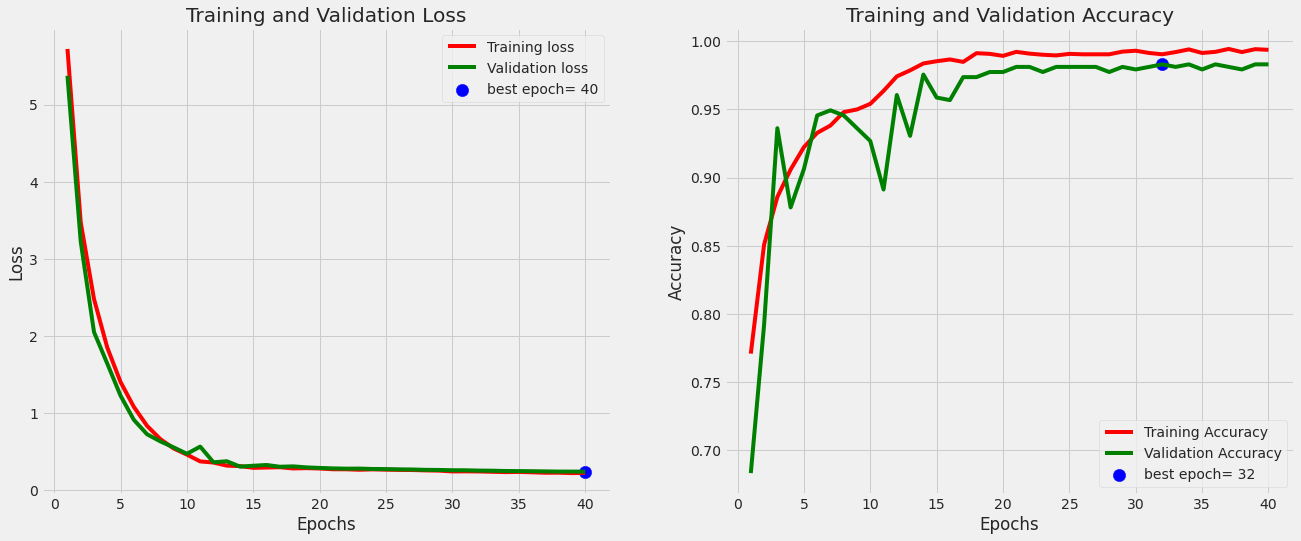

In [ ]:
tr_plot(history,0)


Make predictions on test set, create Confusion Matrix and Classification Report


89/89 [==============================] - 7s 43ms/step
There were 12 errors in 534 test cases Model accuracy=  97.75 %



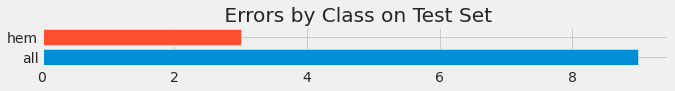

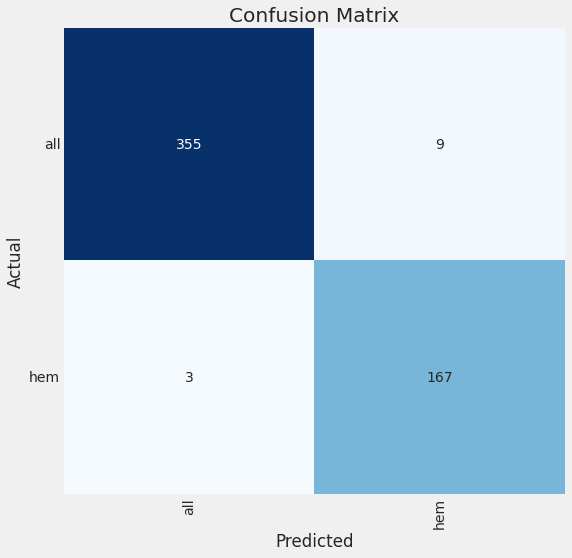

Classification Report:
----------------------
               precision    recall  f1-score   support

         all     0.9916    0.9753    0.9834       364
         hem     0.9489    0.9824    0.9653       170

    accuracy                         0.9775       534
   macro avg     0.9702    0.9788    0.9743       534
weighted avg     0.9780    0.9775    0.9776       534



In [ ]:
subject='leukemia'
print_code=0
preds=model.predict(test_gen) 
acc=print_info( test_gen, preds, print_code, working_dir, subject ) 

Save the model and its class_dict.csv file


In [ ]:
model_save_loc, csv_save_loc=saver(working_dir, model, model_name, subject, acc, img_size, 1,  train_gen)

model was saved as ./EfficientNetB3-leukemia-0.97.h5

class csv file was saved as ./class_dict.csv



Using the trained model to classify a single image
some users have asked how to use the trained model
to classify a single image. Code below demonstrates tha

Input image shape is  (450, 450, 3)
the resized image has shape  (300, 300, 3)
image shape after expanding dimensions is  (1, 300, 300, 3)
1/1 [==============================] - 3s 3s/step
the shape of prediction is  (1, 2)
the image is predicted as being all with a probability of  97.30 %


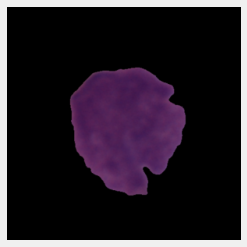

In [ ]:
img_path=r'/content/C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp'
img=plt.imread(img_path)
print ('Input image shape is ', img.shape)
# resize the image so it is the same size as the images the model was trained on
img=cv2.resize(img, img_size) # in earlier code img_size=(224,224) was used for training the model
print ('the resized image has shape ', img.shape)
### show the resized image
plt.axis('off')
plt.imshow(img)
# Normally the next line of code rescales the images. However the EfficientNet model expects images in the range 0 to 255
# img= img/255
# plt.imread returns a numpy array so it is not necessary to convert the image to a numpy array
# since we have only one image we have to expand the dimensions of img so it is off the form (1,224,224,3)
# where the first dimension 1 is the batch size used by model.predict
img=np.expand_dims(img, axis=0)
print ('image shape after expanding dimensions is ',img.shape)
# now predict the image
pred=model.predict(img)
print ('the shape of prediction is ', pred.shape)
# this dataset has 15 classes so model.predict will return a list of 15 probability values
# we want to find the index of the column that has the highest probability
index=np.argmax(pred[0])
# to get the actual Name of the class earlier Imade a list of the class names called classes
klass=classes[index]
# lets get the value of the highest probability
probability=pred[0][index]*100
# print out the class, and the probability 
print(f'the image is predicted as being {klass} with a probability of {probability:6.2f} %')

Process the Test Set and create ssubmission.csv file


In [ ]:
testdir=r'/content/C-NMC_Leukemia/testing_data/C-NMC_test_final_phase_data'
filepaths=[]
klass=[]
flist=os.listdir(testdir)
print ('number of test files is ', len(flist))
for f in flist:
    fpath=os.path.join(testdir,f)
    filepaths.append(fpath)
    klass=' '
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(klass, name='Class')
test_df=pd.concat([Fseries, Lseries], axis=1)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
test_gen=tvgen.flow_from_dataframe( test_df, x_col='filepaths', y_col=None, target_size=img_size, class_mode=None,
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
preds=model.predict(test_gen, verbose=1, steps=test_steps)
for i, p in enumerate(preds):    
    index=np.argmax(p)
    klass=classes[index]
    test_df['Class'].iloc[i]=klass
print (test_df.head())
csv_name='submission'
csv_path=os.path.join(working_dir, csv_name)
test_df.to_csv(csv_path, index=False)
# read in csv file to see if it is correct
df_test=pd.read_csv(csv_path)
print (df_test.head())

number of test files is  2586
test batch size:  6   test steps:  431
Found 2586 validated image filenames.
431/431 [==============================] - 22s 48ms/step
                                           filepaths Class
0  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
1  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
2  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
3  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   all
4  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
                                           filepaths Class
0  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
1  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
2  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem
3  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   all
4  /content/C-NMC_Leukemia/testing_data/C-NMC_tes...   hem


#VGG19

In [ ]:
model_name='VGG19'
base_model=tf.keras.applications.VGG19(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

 initializing callback starting training with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     0.295   90.984   0.25991  92.871   0.00000  0.00000  val_loss     0.00    192.13 

 training has been halted at epoch 1 after 3 adjustments of learning rate with no improvement

Training is completed - model is set with weights from epoch 19 

training elapsed time was 0.0 hours,  3.0 minutes, 12.19 seconds)



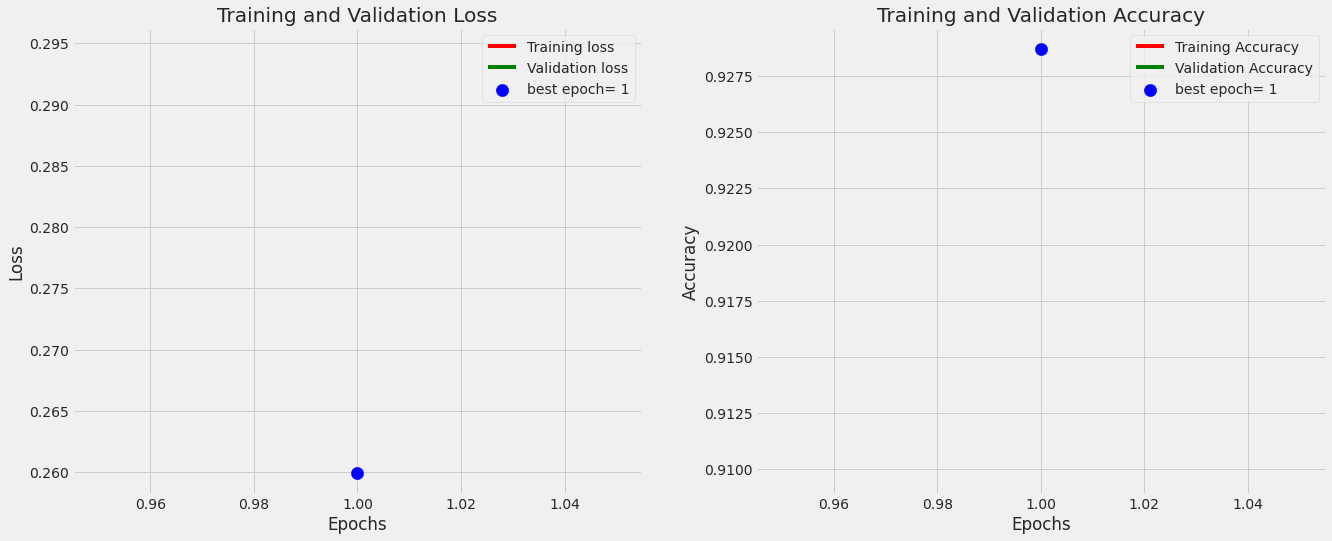

In [ ]:
tr_plot(history,0)

89/89 [==============================] - 8s 95ms/step
There were 27 errors in 534 test cases Model accuracy=  94.94 %



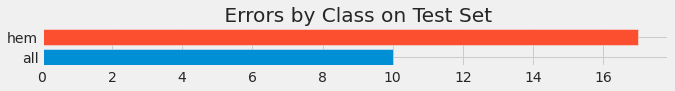

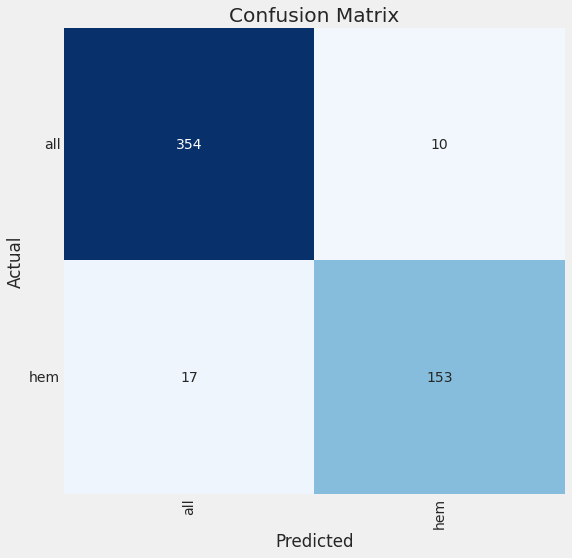

Classification Report:
----------------------
               precision    recall  f1-score   support

         all     0.9542    0.9725    0.9633       364
         hem     0.9387    0.9000    0.9189       170

    accuracy                         0.9494       534
   macro avg     0.9464    0.9363    0.9411       534
weighted avg     0.9492    0.9494    0.9491       534



In [ ]:
subject='leukemia'
print_code=0
preds=model.predict(test_gen) 
acc=print_info( test_gen, preds, print_code, working_dir, subject ) 

#IncepctionResNet V2

In [ ]:
model_name='inception_resnet_v2'
base_model=tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
rftgbyhjm,history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

 initializing callback starting training with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     5.864   79.557   6.47149  61.351   0.00100  0.00100  accuracy     0.00    238.29 

 2 /40     3.740   85.672   4.06887  85.741   0.00100  0.00100  accuracy     7.69    213.29 

 3 /40     2.692   88.377   2.29296  90.619   0.00100  0.00100  accuracy     3.16    213.48 

 4 /40     1.982   90.770   1.99804  82.364   0.00100  0.00100  val_loss    12.86    213.60 

 5 /40     1.501   91.230   1.40527  89.118   0.00100  0.00100  val_loss    29.67    213.23 

enter H to halt training or an integer for number of epochs to run then ask again

25
 training will continue until epoch 30

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 6 /40     1.119   93.311   1.01003  91.932   0.00100  0.00100  val_loss    28.13    211.69 

 7 /40     0.867   93.361   1.22502  76.548   0.00100  0

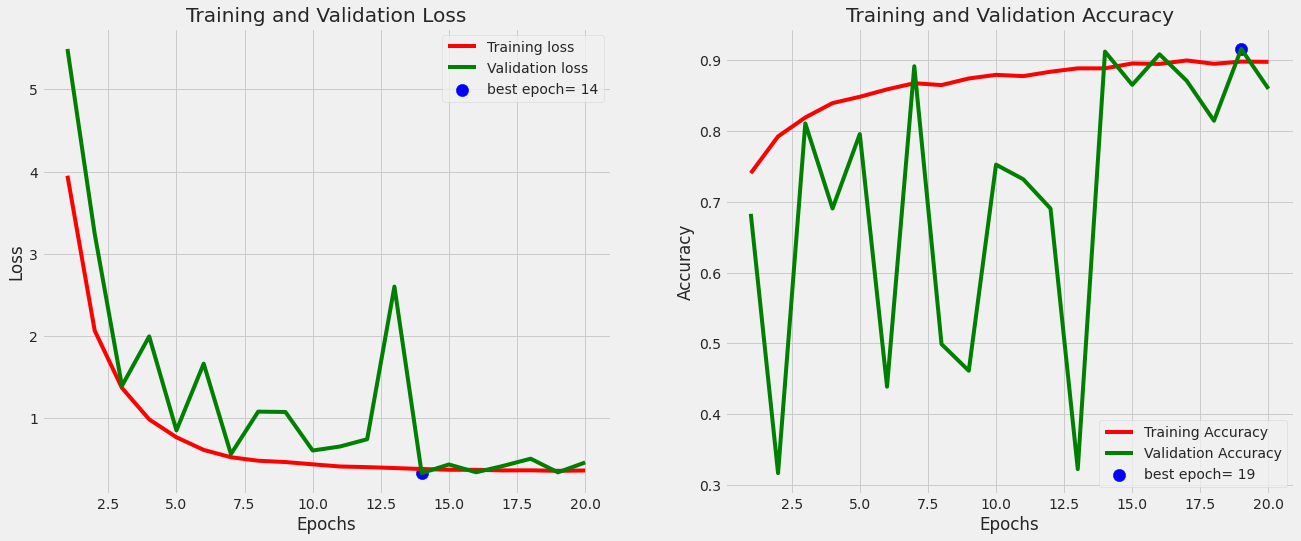

In [ ]:
tr_plot(history,0)

89/89 [==============================] - 8s 93ms/step
There were 68 errors in 534 test cases Model accuracy=  87.27 %



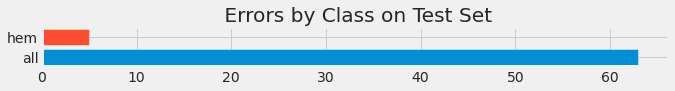

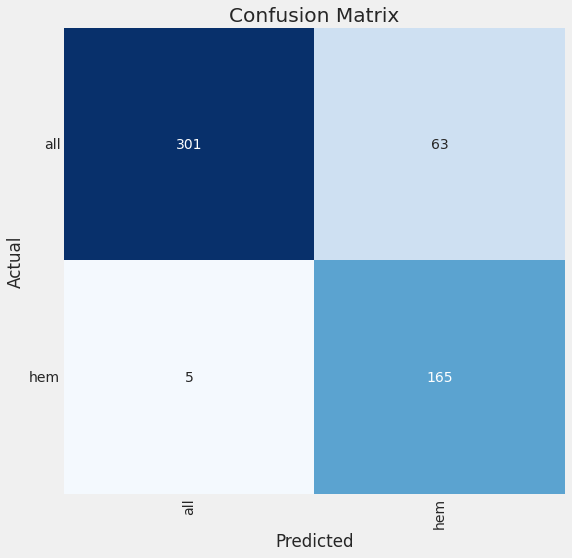

Classification Report:
----------------------
               precision    recall  f1-score   support

         all     0.9837    0.8269    0.8985       364
         hem     0.7237    0.9706    0.8291       170

    accuracy                         0.8727       534
   macro avg     0.8537    0.8988    0.8638       534
weighted avg     0.9009    0.8727    0.8764       534



In [ ]:
subject='leukemia'
print_code=0
preds=model.predict(test_gen) 
acc=print_info( test_gen, preds, print_code, working_dir, subject ) 

#googlenet (Inception v1)

In [ ]:
model_name='Incepvion v1'
base_model=tf.keras.applications.InceptionV3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.45, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy']) 

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce lr by
dwell=True # experimental, if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=5 # number of epochs to run before asking if you want to halt training
batches=train_steps
callbacks=[LRA(model=model,base_model= base_model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]

In [ ]:
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0)

 initializing callback starting training with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     5.638   79.705   4.28823  86.492   0.00100  0.00100  accuracy     0.00    106.54 

 2 /40     2.960   87.508   2.41757  86.304   0.00100  0.00100  accuracy     9.79    83.22  

 3 /40     1.859   89.869   1.54232  89.118   0.00100  0.00100  accuracy     2.70    84.72  

 4 /40     1.209   91.525   1.01123  90.432   0.00100  0.00100  val_loss    34.43    85.19  

 5 /40     0.813   92.361   0.76844  90.994   0.00100  0.00100  val_loss    24.01    85.40  

enter H to halt training or an integer for number of epochs to run then ask again

25
 training will continue until epoch 30

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 6 /40     0.569   93.508   2.02795  39.024   0.00100  0.00050  val_loss   -163.91   85.12  

 7 /40     0.567   94.885   0.64934  87.992   0.00050  0

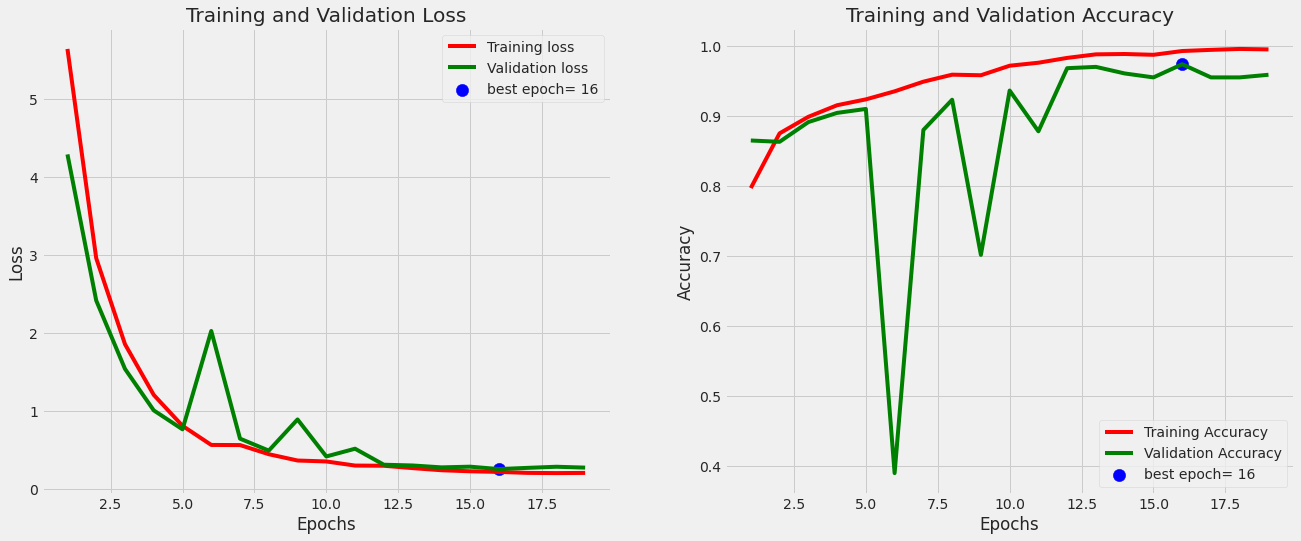

In [ ]:
tr_plot(history,0)

89/89 [==============================] - 5s 30ms/step
There were 16 errors in 534 test cases Model accuracy=  97.00 %



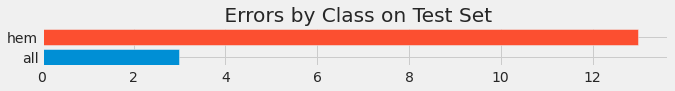

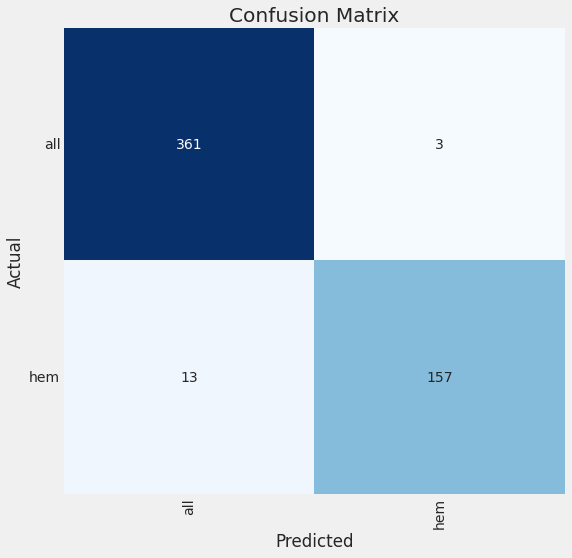

Classification Report:
----------------------
               precision    recall  f1-score   support

         all     0.9652    0.9918    0.9783       364
         hem     0.9812    0.9235    0.9515       170

    accuracy                         0.9700       534
   macro avg     0.9732    0.9576    0.9649       534
weighted avg     0.9703    0.9700    0.9698       534



In [ ]:
subject='leukemia'
print_code=0
preds=model.predict(test_gen) 
acc=print_info( test_gen, preds, print_code, working_dir, subject ) 

**Sample Augmentation**

Text(0.5, 1.0, 'Normal cell before Augmentation')

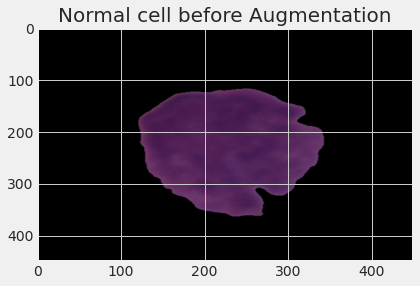

In [ ]:
from numpy import expand_dims
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
img = load_img('/content/C-NMC_Leukemia/training_data/fold_0/all/UID_11_10_1_all.bmp')
plt.imshow(img, aspect="auto")
plt.title('Normal cell before Augmentation', fontsize = 20)


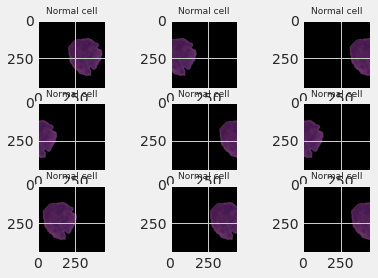

In [ ]:
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
 plt.title('Normal cell', fontsize = 9)
# show the figure
plt.show()

Text(0.5, 1.0, 'Leukemia cell before Augmentation')

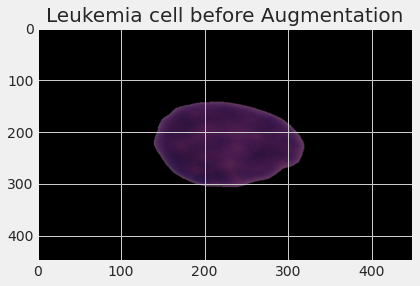

In [ ]:
from numpy import expand_dims
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
img = load_img('/content/C-NMC_Leukemia/training_data/fold_0/hem/UID_H11_10_1_hem.bmp')
plt.imshow(img, aspect="auto")
plt.title('Leukemia cell before Augmentation', fontsize = 20)


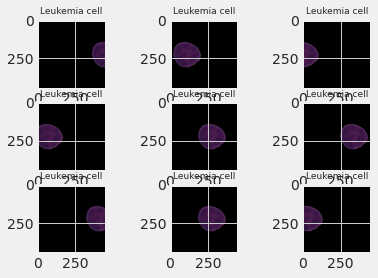

In [ ]:
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 plt.imshow(image)
 plt.title('Leukemia cell', fontsize = 9)
# show the figure
plt.show()